X =  [[-0.28610106047235817, 8.202183279317119], [-3.5207297924959278, -0.4849790608948634], [-3.0560104136587247, 3.976631262652205], [-1.8324640314709706, 1.4799799150480766], [-2.9916518381069137, 5.168728678787238], [-2.052916854617002, 7.141730060027843], [-1.8232552856752555, 8.486860430780109], [-2.4612622490332585, -9.185363609249881], [-2.4533155694905284, 2.040223084641582], [-0.6457584181759142, -0.13710022227798646], [-2.881894105847469, -1.6446832989427058], [-3.0908048997734876, -6.022360842269528], [-0.36089964810191244, 1.8466561509665738], [-1.4573263558250762, 3.3873286655592345], [-4.527952028851805, -6.901161637543398], [-0.8857980346989862, -1.971961486711617], [-0.49957149280186997, 4.003790560647067], [-4.547902842733572, -9.122993202940757], [-1.512817483817202, 0.7130477128521289], [-1.9882246786351794, -3.061722812614618], [-3.612211770136918, -3.4617304179794983], [-4.9042277666615695, -3.2965483735637697], [-0.6690209520332671, -0.49522584238963674], [-3.395

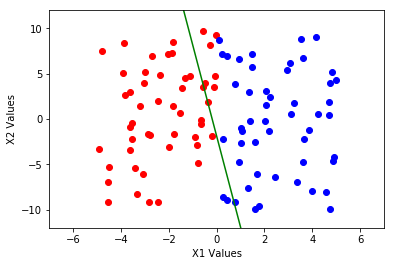

In [5]:
import random
import numpy as np
from math import fabs
import matplotlib.pyplot as pyp
%matplotlib inline
class Pocket(object):
    def __init__(self, nocovars, lrnrate = .9, delta = .01, iterations = 3000):   # Will try with other iteration limits
        self._lr = lrnrate
        self._delta = delta # Stopping point if we get close enough
        self._iterations = iterations # In case data is not linearly separable so algorithm will complete
        self._W = np.zeros(nocovars + 1) # Add one weight for bias
        for i in range(len(self._W)):
            self._W[i] = random.uniform(-1,1)
        self._best_W = self._W

    def activation(self, x):
        if x > 0:
            return 1
        else:
            return -1

    def predict(self, X):
        prod = self._W.T.dot(X) # or just return self.activation(self._W.T.dot(X))
        return self.activation(prod)

    def tot_err(self, X, Y):
        e = np.ones(len(Y))
        for i in range(len(Y)):
            Xb = np.insert(X[i], 0, 1)
            yhat = self.predict(Xb)
            e[i] = Y[i] - yhat
        return np.sum(e)

    def train(self, X, Y):
        # Please train before you test!!
        e = np.ones(len(Y)) # Errors, used to end iteration if it can't find optimal
        i = 0
        e_best = np.sum(e)

        while np.sum(e) > self._delta and i < self._iterations:
            Xb = np.insert(X[i%len(X)], 0, 1) # Add a x^0 term for the bias
            yhat = self.predict(Xb)
            err = Y[i%len(Y)] - yhat
            e[i%len(Y)] = fabs(err) # Don't want errors to cancel each other out in total sum
            self._W = self._W + self._lr*err*Xb # Error direction remains here
            i += 1

            ## All below until print line are potentially not correct?
            if i%len(Y) == 0: # after every full iteration of going through the weights
                if np.sum(e) < e_best: # if the new sum of errors is better than the best one so far:
                    e_best = np.sum(e) # update our best errors
                    self._best_W = self._W # keep track of the best one
            if np.sum(e) < e_best:
                e_best = np.sum(e)
                self._best_W = self._W

        print("Total sum of errors = ", np.sum(e))
        return self._best_W 
    
    def test(self, X, Y, showall = True):
        # Don't test until you have trained!! (Results will be random and bad)
        crt = 0 # Total correct
        incrt = 0 # Total incorrect
        tot = 0 # Total
        for i in range(len(Y)):
            Xb = np.insert(X[i], 0, 1) # Same as before, need to add for lengths to match
            yhat = self.predict(Xb)
            if showall:
                print("Predicted: ", yhat, " Actual: ", Y[i]) # To see the predictions
            if Y[i] - yhat == 0:
                crt += 1
            tot += 1
        crt_pct = float(crt)/float(tot)
        print("Percentage of Correct Classifications = ", crt_pct)

    def get_eqn(self, X, Y):
        equn = "Y_hat ="
        for i in range(len(self._best_W)):
            equn += str(self._best_W[i])
            if i != 0:
                equn += "X"
                equn += str(i)
            if i + 1 != len(self._best_W):
                equn += str(" + ")
        print(equn)

def get_col(X, i):
    return [row[i] for row in X]

if __name__ == "__main__":
    Y = [None]*100
    X = [None]*100
    for i in range(0, 50):
        X[i] = [random.uniform(-5, 0), random.uniform(-10,10)]
        Y[i] = -1
        if i%10 == 0:
            Y[i] = -Y[i]
    for j in range(50, 100):
        X[j] = [random.uniform(0, 5), random.uniform(-10,10)]
        Y[j] = 1
        if i%10 == 0:
            Y[i] = -Y[i]


    np.asarray(X)


    print("X = ", X)
    print("Y = ", Y)
    p = Perceptron(nocovars = 2)
    p.train(X, Y)
    print(p._best_W)

    p.get_eqn(X, Y)

    axes = pyp.gca()
    axes.set_xlim([-7,7])
    axes.set_ylim([-12,12])
    x0 = get_col(X, 0)
    x1 = get_col(X, 1)
    X0red = x0[:len(x0)//2]

    X0blue = x0[len(x0)//2:]
    X1red = x1[:len(x1)//2]
    X1blue = x1[len(x1)//2:]
    pyp.plot(X0red, X1red, 'r.', markersize = 12)
    pyp.plot(X0blue, X1blue, 'b.', markersize = 12)

    pyp.ylabel("X2 Values")
    pyp.xlabel("X1 Values")
    wlx = np.array(range(-5, 5))
    wly = eval('(-p._best_W[1]*wlx - p._best_W[0]) / p._best_W[2]')
    pyp.plot(wlx, wly, 'g')
    pyp.show()
